In [ ]:
import pandas as pd

df_train = pd.read_csv('/content/train_data.txt', sep=' ::: ', engine='python', names=['id', 'title', 'genre', 'description'])
df_test= pd.read_csv('/content/test_data.txt', sep=' ::: ', engine='python', names=['id', 'title',  'description'])
df_test_evaluation= pd.read_csv('/content/test_data_solution.txt', sep=' ::: ', engine='python', names=['id', 'title', 'genre', 'description'])

In [ ]:
df_train.head()

,id,title,genre,description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           54214 non-null  int64 
 1   title        54214 non-null  object
 2   genre        54214 non-null  object
 3   description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [ ]:
df_train.describe()

,id
count,54214.000000
mean,27107.500000
std,15650.378084
min,1.000000
25%,13554.250000
50%,27107.500000
75%,40660.750000
max,54214.000000


In [ ]:
df_train.isnull().sum()

,0
id,0
title,0
genre,0
description,0


In [ ]:
df_train.duplicated().sum()

np.int64(0)

In [ ]:
df_train['genre'].unique()

array(['drama', 'thriller', 'adult', 'documentary', 'comedy', 'crime',
       'reality-tv', 'horror', 'sport', 'animation', 'action', 'fantasy',
       'short', 'sci-fi', 'music', 'adventure', 'talk-show', 'western',
       'family', 'mystery', 'history', 'news', 'biography', 'romance',
       'game-show', 'musical', 'war'], dtype=object)

In [ ]:
df_train['genre'].value_counts()

,count
genre,
drama,13613
documentary,13096
comedy,7447
short,5073
horror,2204
thriller,1591
action,1315
western,1032
reality-tv,884


In [ ]:
# already preprocessing for text we are going convert the text in to lower case
df_train['description'] = df_train['description'].str.lower()

In [ ]:
df_train['description'].head()


,description
0,listening in to a conversation between his doc...
1,a brother and sister with a past incestuous re...
2,as the bus empties the students for their fiel...
3,to help their unemployed father make ends meet...
4,the film's title refers not only to the un-rec...


In [ ]:
#now we will remove the punctuations or characters lile @*&6 from this description column
import re
df_train['description'] = df_train['description'].apply(lambda x: re.sub('[^a-z\s]', '', x))


In [ ]:
df_train['description'].head()

,description
0,listening in to a conversation between his doc...
1,a brother and sister with a past incestuous re...
2,as the bus empties the students for their fiel...
3,to help their unemployed father make ends meet...
4,the films title refers not only to the unrecov...


In [ ]:
# removing unwanated words from description like the is a am you yours etc which is not valuable for better training and preprocessing
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


In [ ]:
df_train['description'] = df_train['description'].apply( lambda text: ' '.join([word for word in text.split() if word not in stop_words])
)


In [ ]:
df_train['description'].head()

,description
0,listening conversation doctor parents yearold ...
1,brother sister past incestuous relationship cu...
2,bus empties students field trip museum natural...
3,help unemployed father make ends meet edith tw...
4,films title refers unrecovered bodies ground z...


In [ ]:
# stemming helps me out for generalizing words
from nltk.stem import PorterStemmer

ps = PorterStemmer()

df_train['description'] = df_train['description'].apply(
    lambda text: ' '.join([ps.stem(word) for word in text.split()])
)


In [ ]:
#mostly the preprocessing is done now we go forward for feature selection
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()



In [ ]:
X_train  = tfidf.fit_transform(df_train['description'])


In [ ]:
print(X_train.shape)

(54214, 110478)


In [ ]:
# as already this dataset is splitted in test and training we dont need to split it direct going for target variable here which is genre column
y_train = df_train['genre']


In [ ]:
# model training
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)  # max_iter increased to ensure convergence


In [ ]:
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
# now preprocessing the test data for prediction
import pandas as pd
df_test.describe()
df_test.isnull().sum()

,0
id,0
title,0
description,0


In [ ]:
df_test['description'] = df_test['description'].str.lower()


In [ ]:
import re
df_test['description'] = df_test['description'].apply(lambda x: re.sub(r'[^a-z\s]', '', x))


In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df_test['description'] = df_test['description'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in stop_words])
)


In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def stem_text(text):
    return ' '.join([ps.stem(word) for word in text.split()])

df_test['description'] = df_test['description'].apply(stem_text)


In [ ]:
X_test = tfidf.transform(df_test['description'])


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# evaluation
import pandas as pd
df_test_evaluation

,id,title,genre,description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apart..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty chi..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family o...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with his..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a marti...
...,...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)",horror,"Covering multiple genres, Tales of Light & Dar..."
54196,54197,Der letzte Mohikaner (1965),western,As Alice and Cora Munro attempt to find their ...
54197,54198,Oliver Twink (2007),adult,"A movie 169 years in the making. Oliver Twist,..."
54198,54199,Slipstream (1973),drama,"Popular, but mysterious rock D.J Mike Mallard ..."


In [ ]:
# doing preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Lowercasing
df_test_evaluation['description'] = df_test_evaluation['description'].str.lower()

# Remove punctuation/special characters using regex
df_test_evaluation['description'] = df_test_evaluation['description'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

# Remove stopwords and apply stemming
def preprocess_text(text):
    words = text.split()
    filtered = [ps.stem(word) for word in words if word not in stop_words]
    return ' '.join(filtered)

df_test_evaluation['description'] = df_test_evaluation['description'].apply(preprocess_text)


In [ ]:
X_evaluation = tfidf.transform(df_test_evaluation['description'])
y_pred = model.predict(X_evaluation)


In [ ]:
#we have done evaluation file preprocessing and featreing done now we r doing hypertunning and evaluate
from sklearn.metrics import classification_report, accuracy_score

y_true = df_test_evaluation['genre']
print(classification_report(y_true, y_pred))
print("Accuracy:", accuracy_score(y_true, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

      action       0.51      0.29      0.37      1314
       adult       0.64      0.23      0.34       590
   adventure       0.69      0.17      0.27       775
   animation       0.47      0.04      0.07       498
   biography       0.00      0.00      0.00       264
      comedy       0.55      0.60      0.57      7446
       crime       0.35      0.03      0.06       505
 documentary       0.66      0.85      0.75     13096
       drama       0.54      0.79      0.64     13612
      family       0.50      0.08      0.14       783
     fantasy       0.67      0.04      0.07       322
   game-show       0.91      0.50      0.65       193
     history       0.00      0.00      0.00       243
      horror       0.67      0.59      0.63      2204
       music       0.64      0.42      0.51       731
     musical       0.00      0.00      0.00       276
     mystery       0.17      0.00      0.01       318
        news       0.80    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# got baseline accuracy now i will create a function which will predict the unseen data
def preprocess_and_predict(description):
    # Preprocess
    import re
    from nltk.corpus import stopwords
    from nltk.stem import PorterStemmer

    desc = description.lower()
    desc = re.sub(r'[^a-zA-Z\s]', '', desc)
    words = desc.split()
    words = [w for w in words if w not in stopwords.words('english')]
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]
    desc = ' '.join(words)
    # Transform using existing fitted TF-IDF
    X_input = tfidf.transform([desc])
    # Predict
    predicted_genre = model.predict(X_input)[0]
    return predicted_genre




In [ ]:
# testing
new_description = "A young wizard battles dark forces at a school of magic."
print("Predicted Genre:", preprocess_and_predict(new_description))


Predicted Genre: fantasy


In [ ]:
# testing
new_description = "love is in air love the way love my lovie"
print("Predicted Genre:", preprocess_and_predict(new_description))

NameError: name 'preprocess_and_predict' is not defined

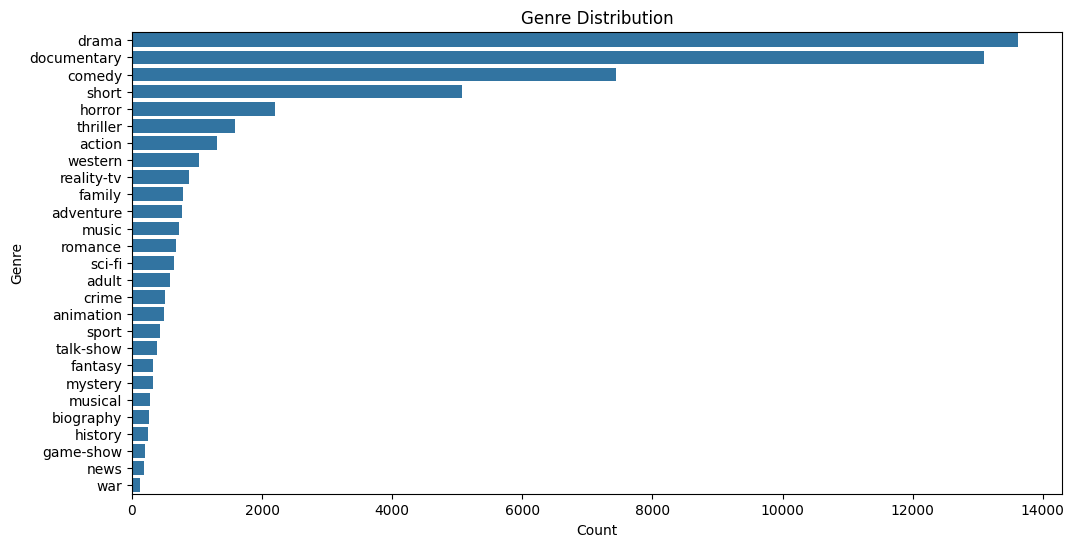

genre
drama          13613
documentary    13096
comedy          7447
short           5073
horror          2204
thriller        1591
action          1315
western         1032
reality-tv       884
family           784
adventure        775
music            731
romance          672
sci-fi           647
adult            590
crime            505
animation        498
sport            432
talk-show        391
fantasy          323
mystery          319
musical          277
biography        265
history          243
game-show        194
news             181
war              132
Name: count, dtype: int64


In [ ]:
# EDA after selecting features and finding patterns
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.countplot(data=df_train, y='genre', order=df_train['genre'].value_counts().index)
plt.title("Genre Distribution")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

# Also get value counts
print(df_train['genre'].value_counts())


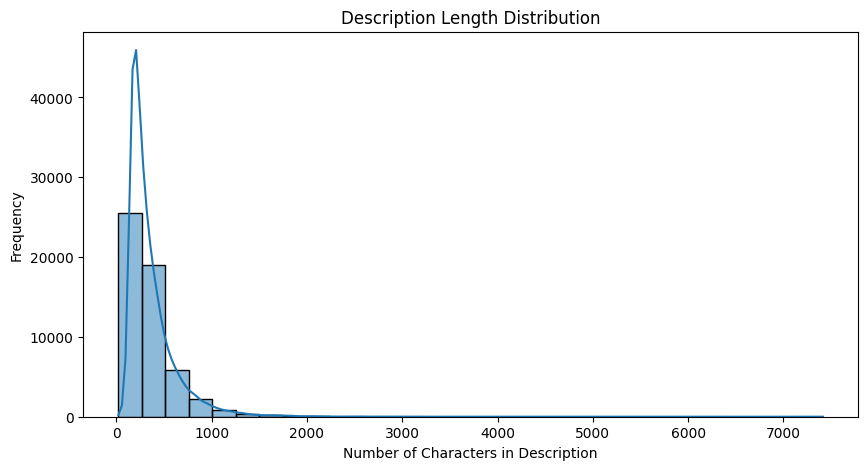

In [ ]:
# checking the test lenght
df_train['desc_length'] = df_train['description'].apply(len)

# Plot distribution
plt.figure(figsize=(10,5))
sns.histplot(df_train['desc_length'], bins=30, kde=True)
plt.title("Description Length Distribution")
plt.xlabel("Number of Characters in Description")
plt.ylabel("Frequency")
plt.show()


genre
game-show      444.726804
western        417.615310
documentary    401.814905
mystery        394.858934
war            394.257576
biography      393.920755
romance        379.148810
drama          377.051642
history        371.370370
horror         358.808530
sport          356.449074
musical        352.841155
family         352.501276
music          351.844049
action         347.006844
thriller       346.296040
fantasy        344.832817
crime          339.201980
comedy         338.982812
sci-fi         333.670788
adventure      331.081290
reality-tv     325.447964
animation      325.234940
talk-show      313.820972
news           308.475138
short          292.598068
adult          292.177966
Name: desc_length, dtype: float64


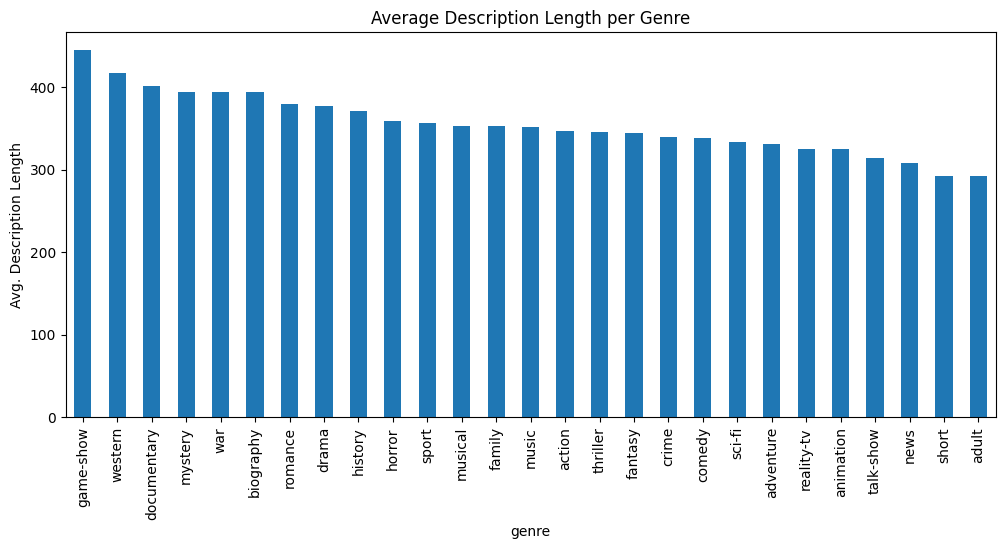

In [ ]:
# average description lenght
avg_len = df_train.groupby('genre')['desc_length'].mean().sort_values(ascending=False)
print(avg_len)

# Plot
avg_len.plot(kind='bar', figsize=(12,5), title="Average Description Length per Genre")
plt.ylabel("Avg. Description Length")
plt.show()
